In [21]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [22]:
data = pd.read_csv('data/train.csv')
#data = data.drop(columns=['id','diagnosis'])
data = data.fillna(0)
print(data)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

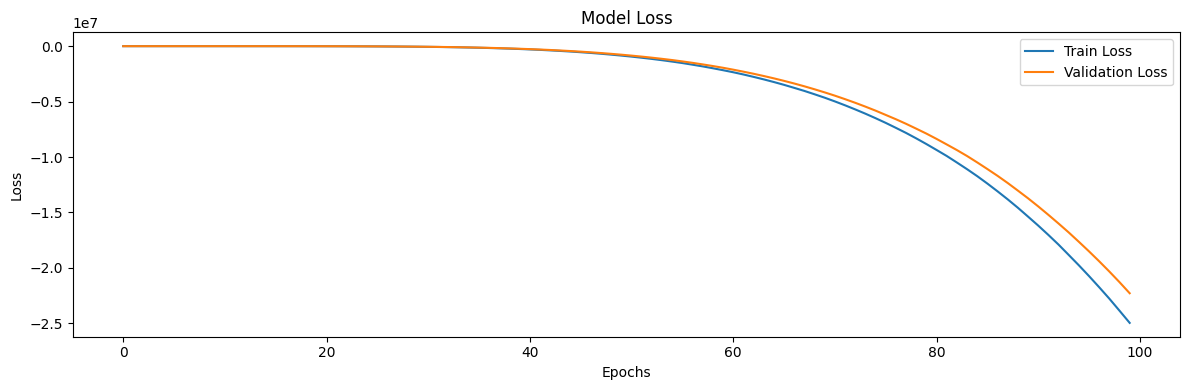

In [ ]:
# Encode and Normalize the data
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object'):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
# Normalise data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Split the data into features and target
X = df_encoded.drop(columns=['diagnosis','id'])
y= df_encoded['diagnosis']

model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
# Plotting the training history
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import  accuracy_score
y_pred = model.predict(X)

original= df_encoded['diagnosis']
print(original)

# Reverse label encoding for y
y_original = label_encoders['diagnosis'].inverse_transform(y)
# Reverse label encoding for y_pred
y_pred_original = label_encoders['diagnosis'].inverse_transform(np.round(y_pred).astype(int).flatten())
accuracy_score(y_original, y_pred_original)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0      1.297676
1      1.297676
2      1.297676
3      1.297676
4      1.297676
         ...   
564    1.297676
565    1.297676
566    1.297676
567    1.297676
568   -0.770609
Name: diagnosis, Length: 569, dtype: float64


ValueError: y contains previously unseen labels: [-0.77060855  1.29767572]